<a href="https://colab.research.google.com/github/DINESH8675/StoreSalesPrediction/blob/main/projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [ ]:

df_store = pd.read_csv("/content/stores_data_set (1).csv")

In [ ]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_sales = pd.read_csv("/content/sales_data_set.csv")

In [ ]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
d = df_sales.merge(df_store,on=["Store"],how ="inner")

In [ ]:
d.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


In [ ]:
df=pd.read_csv("/content/Features_data_set (1).csv")

In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df1=df.merge(d,on = ['Store','Date'],how = 'inner')


In [ ]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False,A,151315


In [ ]:
df1.drop(['IsHoliday_y'],axis = 1,inplace = True)

In [ ]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [ ]:
df1.rename(columns={"IsHoliday_x":"IsHoliday"},inplace=True)

In [ ]:
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


In [ ]:
df1.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [ ]:
df1.shape

(421570, 16)

In [ ]:
df1.fillna(0,inplace = True)


In [ ]:
df1.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000


In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['IsHoliday'] = df1['IsHoliday'].map({True:1, False:0})
df1['Type'] = df1['Type'].map({'A':1, 'B':2, 'C':3})

In [ ]:
df1.shape

(421570, 16)

In [ ]:
df1.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,1,151315
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,1,151315
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,1,151315
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,1,151315
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,1,151315
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,6,5749.03,1,151315
6,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,7,21084.08,1,151315
7,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,8,40129.01,1,151315
8,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,9,16930.99,1,151315
9,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,10,30721.50,1,151315


In [ ]:
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1.drop(columns=['Date'], inplace=True)
df1

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Day,Month,Year
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,24924.50,1,151315,2,5,2010
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,2,50605.27,1,151315,2,5,2010
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,3,13740.12,1,151315,2,5,2010
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,4,39954.04,1,151315,2,5,2010
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,5,32229.38,1,151315,2,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2487.80,2,118221,26,10,2012
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,5203.31,2,118221,26,10,2012
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,56017.47,2,118221,26,10,2012
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,6817.48,2,118221,26,10,2012


In [ ]:
df1.shape

(421570, 18)

In [ ]:
df1.tail()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Day,Month,Year
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2487.80,2,118221,26,10,2012
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,5203.31,2,118221,26,10,2012
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,56017.47,2,118221,26,10,2012
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,6817.48,2,118221,26,10,2012
421569,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,98,1076.80,2,118221,26,10,2012


In [ ]:
df1.drop(df1[df1['Weekly_Sales']<0].index,inplace=True)


In [ ]:
df1.shape

(420285, 18)

In [ ]:
df1['markdown'] = (df1[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]==0).all(axis=1).astype(int)
df1.tail()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Day,Month,Year,markdown
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2487.80,2,118221,26,10,2012,0
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,5203.31,2,118221,26,10,2012,0
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,56017.47,2,118221,26,10,2012,0
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,6817.48,2,118221,26,10,2012,0
421569,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,98,1076.80,2,118221,26,10,2012,0


In [ ]:
df1['markdown'].value_counts()

1    269337
0    150948
Name: markdown, dtype: int64

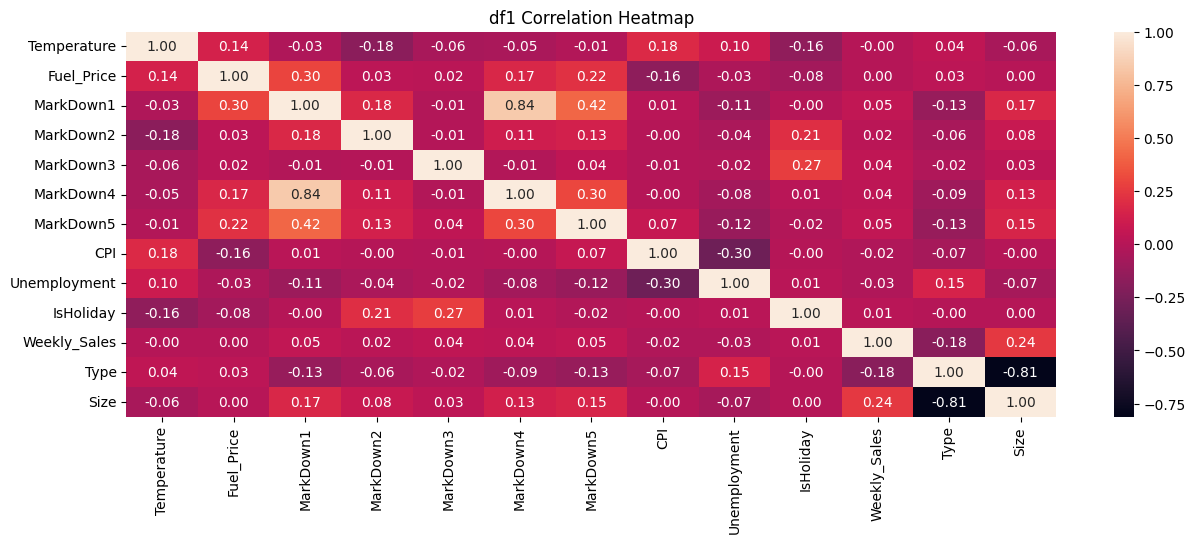

In [ ]:
import seaborn as sns

df1_corr = df1.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()
plt.figure(figsize=(15, 5))
sns.heatmap(df1_corr, annot=True, fmt=".2f")
plt.title("df1 Correlation Heatmap")
plt.show()

   Type  Store
0     1     22
1     2     17
2     3      6


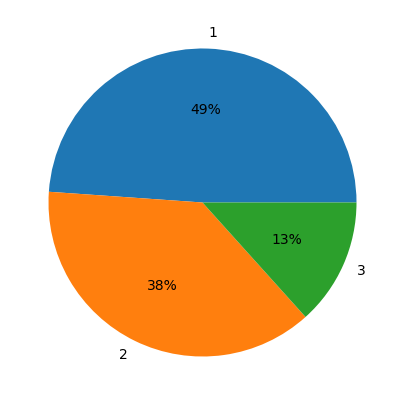

In [ ]:
temp = pd.DataFrame(df1.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (15,5))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()

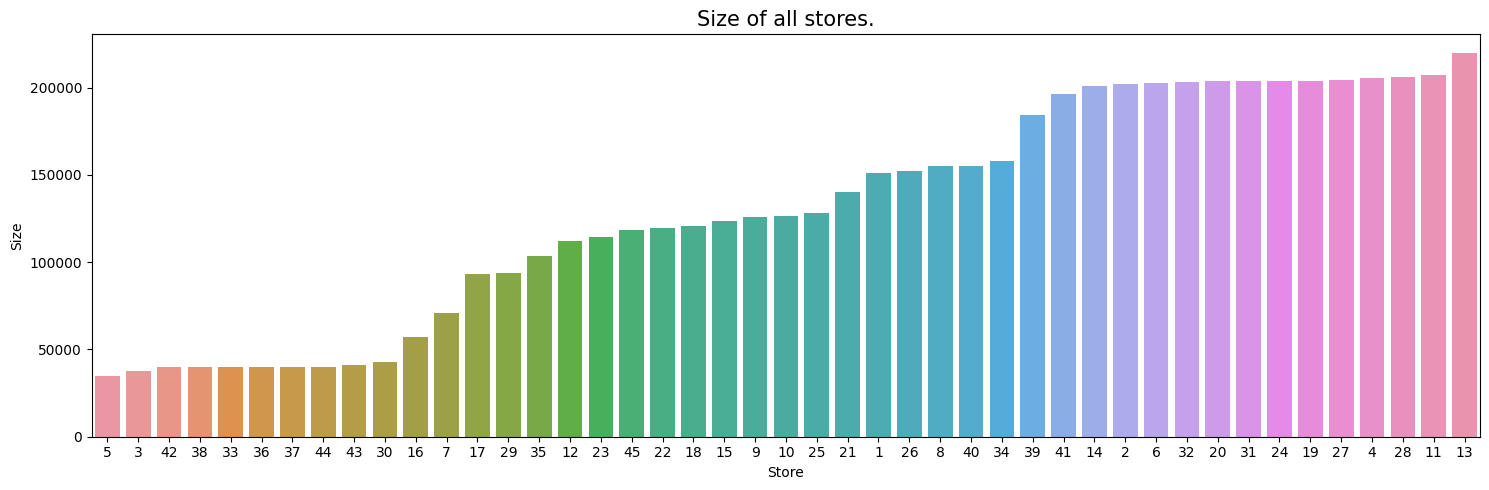

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=df_store,order=df_store.sort_values('Size')['Store'].tolist())
plt.title('Size of all stores.',fontsize=15)
plt.tight_layout();

<Axes: xlabel='Type', ylabel='Size'>

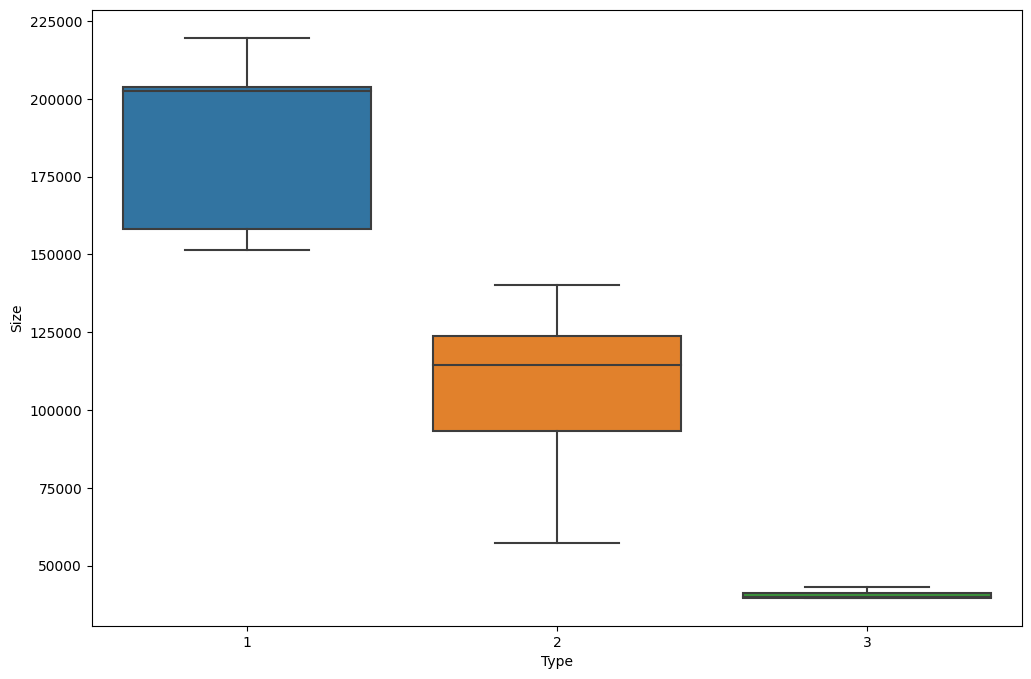

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = df1, showfliers = False)

In [ ]:
sales_by_the_dept_and_holiday=df1.groupby(['Dept','IsHoliday'])['Weekly_Sales'].sum().reset_index()
sales_by_the_dept_and_holiday

,Dept,IsHoliday,Weekly_Sales
0,1,0,1.147716e+08
1,1,1,8.867169e+06
2,2,0,2.616197e+08
3,2,1,1.899147e+07
4,3,0,7.041132e+07
...,...,...,...
157,97,1,6.133824e+06
158,98,0,3.663742e+07
159,98,1,3.191647e+06
160,99,0,2.391368e+05


In [ ]:
df1.IsHoliday.unique()

array([0, 1])

In [ ]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df1.groupby('markdown')['Weekly_Sales'].mean()

markdown
0    16229.073011
1    15918.945543
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

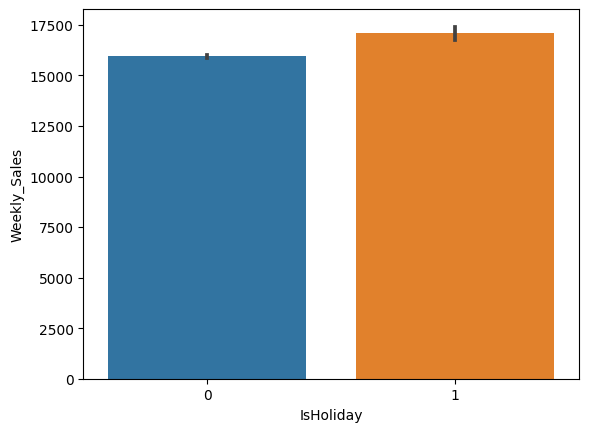

In [ ]:
#holiday(1) and non-holiday(0)
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df1)


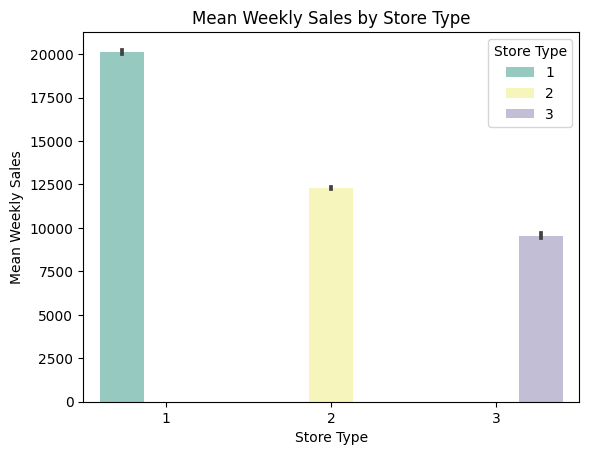

In [ ]:
sns.barplot(x='Type', y='Weekly_Sales', data=df1, hue='Type', palette='Set3')
plt.title('Mean Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Mean Weekly Sales')
plt.legend(title='Store Type')
plt.show()
#1=store A
#2=store B
#3=store C

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

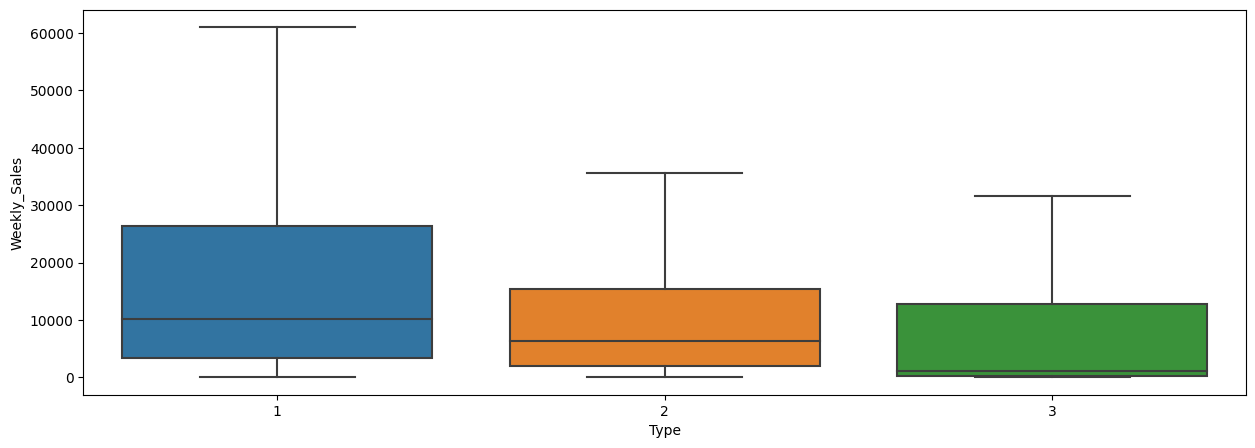

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Type',y='Weekly_Sales',data=df1,showfliers=False)

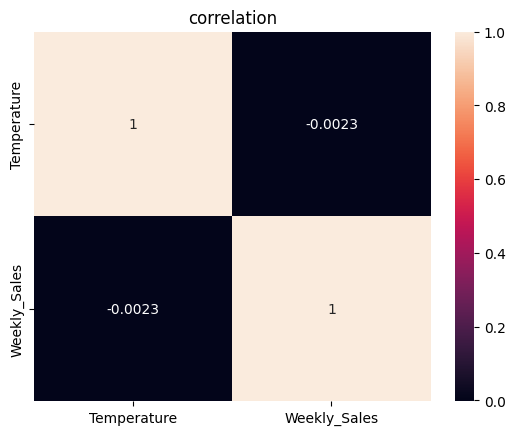

In [ ]:
sns.heatmap(df1[['Temperature','Weekly_Sales']].corr(),annot=True)
plt.title('correlation')
plt.show()

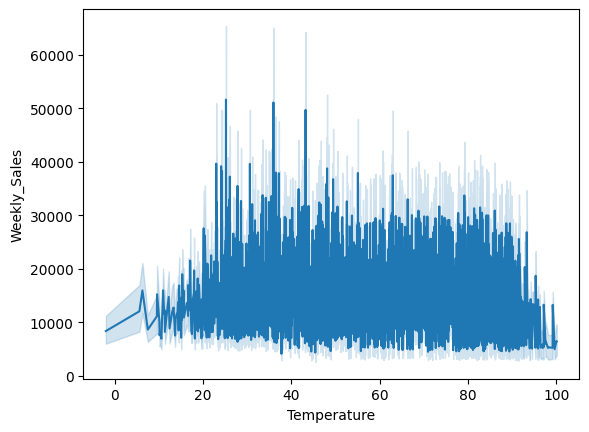

In [ ]:
sns.lineplot(data=df1,x='Temperature',y='Weekly_Sales')
plt.show()


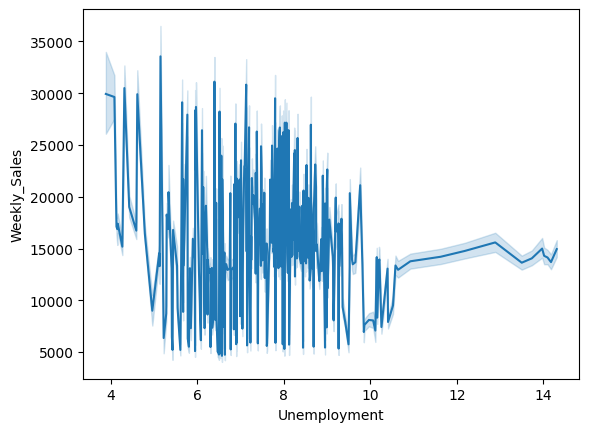

In [ ]:
sns.lineplot(data=df1,x='Unemployment',y='Weekly_Sales')
plt.show()

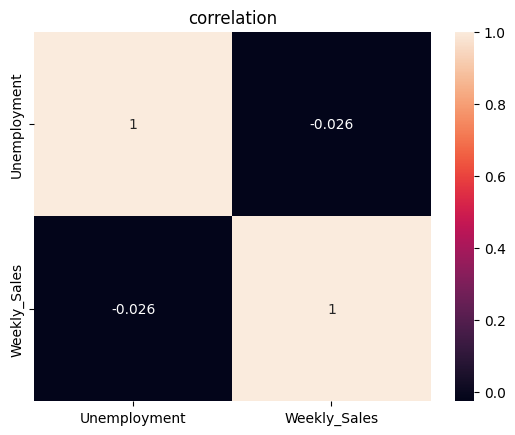

In [ ]:
sns.heatmap(df1[['Unemployment','Weekly_Sales']].corr(),annot=True)
plt.title('correlation')
plt.show()

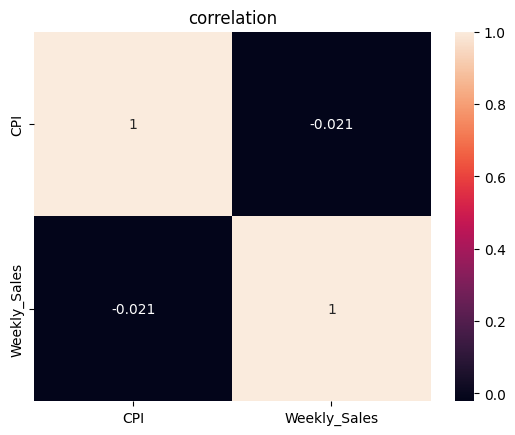

In [ ]:
sns.heatmap(df1[['CPI','Weekly_Sales']].corr(),annot=True)
plt.title('correlation')
plt.show()

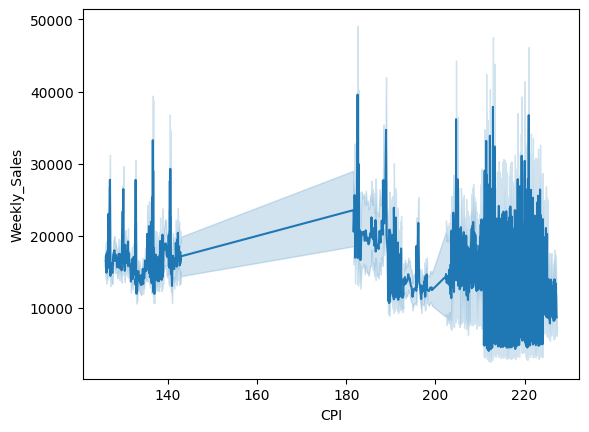

In [ ]:
sns.lineplot(data=df1,x='CPI',y='Weekly_Sales')
plt.show()

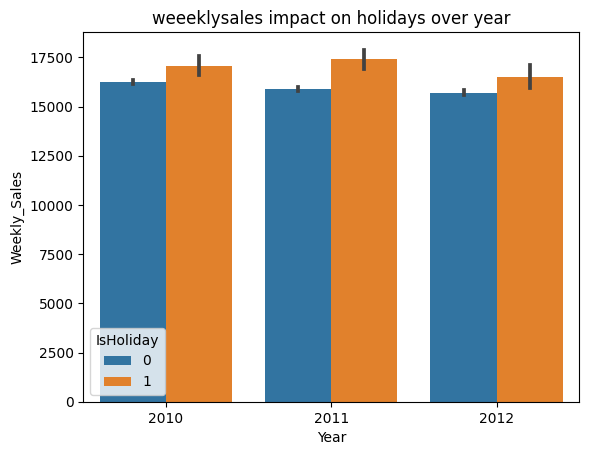

In [ ]:
sns.barplot(data=df1,x='Year',y='Weekly_Sales',hue='IsHoliday')
plt.title("weeeklysales impact on holidays over year")
plt.show()

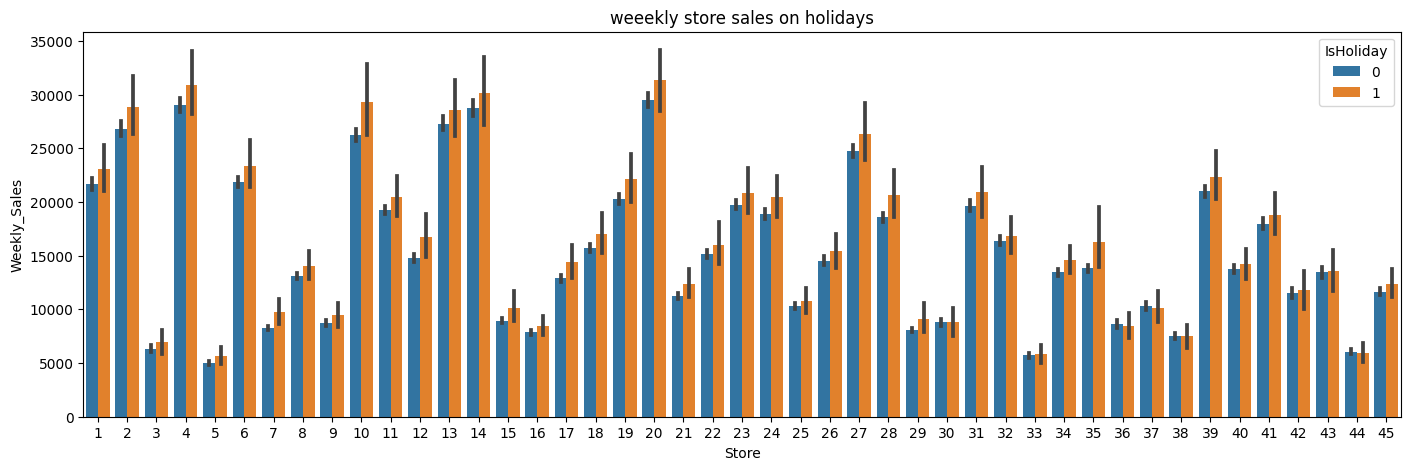

In [ ]:
plt.figure(figsize=(17,5))
sns.barplot(data=df1,x='Store',y='Weekly_Sales',hue='IsHoliday')
plt.title("weeekly store sales on holidays")
plt.show()

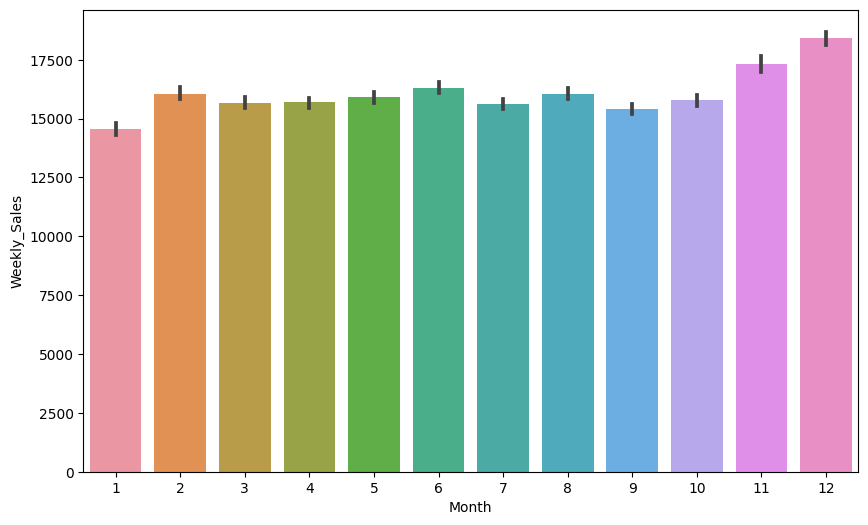

In [ ]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df1)

In [ ]:
#Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(df1[feature_cols])
df1[feature_cols] = transformed_features
feature_cols  = df1.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(df1[feature_cols], df1['Weekly_Sales'], test_size = 0.2, random_state = 1234)



In [ ]:
x_train

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,Day,Month,Year,markdown
176821,18,0.007563,1.515983,0.864086,-0.164909,-0.031081,0.061607,1.306598,-0.831381,0.308456,0,67,2,-0.263910,21,9,2012,0
227131,24,-1.415337,-0.983351,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,-1.009293,0.196324,0,52,1,1.099632,26,2,2010,1
201946,21,0.096460,1.188845,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,1.129474,-0.015600,0,81,2,0.056030,5,6,2011,1
188303,20,0.360442,-0.861219,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,0.827277,-0.055839,0,44,1,1.098370,5,7,2010,1
324730,34,-0.244494,0.292487,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,-1.090335,1.307989,0,6,1,0.350279,18,3,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295374,31,1.383304,-1.609275,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,1.009790,0.074535,0,46,1,1.098501,16,7,2010,1
345790,36,1.161603,-0.281095,-0.386647,-0.173111,-0.084707,-0.278111,-0.238602,1.260269,-0.717366,0,81,1,-1.587726,7,6,2012,0
221195,23,-0.790345,1.007829,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,-0.943094,-1.705631,0,58,2,-0.364250,15,4,2011,1
385211,41,-1.188757,0.218336,-0.427903,-0.173111,-0.084714,-0.278111,-0.395323,0.537687,-0.550509,0,58,1,0.976699,4,1,2011,1


In [ ]:
#Decision Tree Regressor Testing

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 2041.8596030074832
RMSE is - 5330.6499760587885
Accuracy Score is - 0.9457121650697583


In [ ]:
#Random Forest Regressor Testing

In [ ]:
randomforest_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
randomforest_regressor.fit(x_train, y_train)
y_pred = randomforest_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {randomforest_regressor.score(x_test, y_test)}')


MAE is - 2101.4122573831123
RMSE is - 4884.086200262028
Accuracy Score is - 0.9544268729514233


In [80]:
model = randomforest_regressor.fit(x_train, y_train)
import pickle
with open('model12.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler12.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)


In [ ]:
#KNN regressor Testing

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')

MAE is - 8887.579701309825
RMSE is - 15016.555766833006
Accuracy Score is - 0.5691928970540745
